
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [51]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [52]:
import sklearn
sklearn.__version__

'0.24.1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [53]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False, as_frame=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

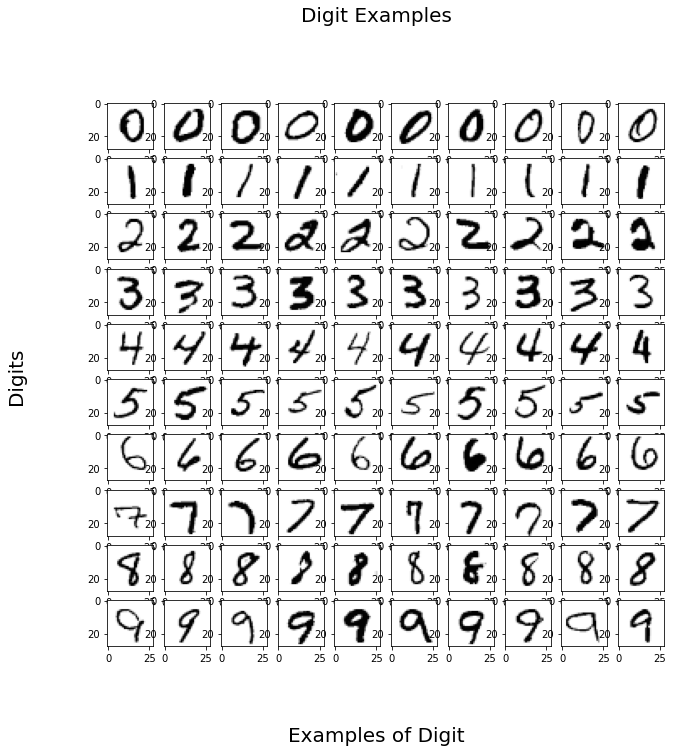

In [54]:
def Q1(num_examples=10):
  ### STUDENT START ###

    # make the plot size
    plt.figure(figsize=(10,10))
    
    # get each number from (0-9)
    for i in range(10):
        # pull num_examples amount of examples of i from data into an array
        example = mini_train_data[mini_train_labels == f'{i}'][:num_examples]
        # get num_examples number of copies
        for j in range(num_examples): 
            # make subplots for each item
            plt.subplot(10, num_examples, i*num_examples+j+1)
            # plot the pulled digit from the array created earlier
            digit = example[j].reshape((28,28))            
            plt.imshow(digit)
    
    # title
    plt.figtext(0.5, 1, "Digit Examples", ha='center', va='center', fontsize=20)
    # x-axis label
    plt.figtext(0.5, 0, "Examples of Digit", ha='center', va='center', fontsize=20)
    # y-axis label
    plt.figtext(0, 0.5, "Digits", ha='center', va='center', fontsize=20, rotation=90)
    
  ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [59]:
def Q2(k_values):

### STUDENT START ###

    for num in k_values:
        # make the K-Nearest Neighbors model
        knn = KNeighborsClassifier(n_neighbors=num)
        
        # fit model on mini train set
        knn.fit(mini_train_data, mini_train_labels)
        
        # print precision, recall, and F1 for each label when num is 1
        if num == 1:
            print("Classification for 1-Nearest Neighbor")
            print(classification_report(dev_labels, knn.predict(dev_data)))
        
        # print accuracy of each model
        print("Accuracy with", num, "Nearest Neighbors:", knn.score(dev_data, dev_labels))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

Classification for 1-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy with 1 Nearest Neighbors: 0.884
Accuracy with 3 Nearest Neighbors: 0.876
Accuracy with 5 Nearest Neighbors: 0.882
Accuracy with 7 Nearest Neighbors: 0.877
Accuracy with 9 Nearest Neighbors: 0.87

Answer to part 4: The digit most difficult for the 1-Nearest Neighbor model to classify correctly seems to be 9. It has the lowest precision, recall is low-moderate, and it's f1 score is one of the lowest so we can conclude that 9 has the most difficulty.

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

Training size = 100 accuracy: 0.702
Time needed for training: 0.0009984970092773438
Time needed for calculating accuracy: 0.025046825408935547

Training size = 200 accuracy: 0.791
Time needed for training: 0.0010004043579101562
Time needed for calculating accuracy: 0.02777719497680664

Training size = 400 accuracy: 0.811
Time needed for training: 0.0009996891021728516
Time needed for calculating accuracy: 0.03204917907714844

Training size = 800 accuracy: 0.866
Time needed for training: 0.0010004043579101562
Time needed for calculating accuracy: 0.03509068489074707

Training size = 1600 accuracy: 0.884
Time needed for training: 0.0019998550415039062
Time needed for calculating accuracy: 0.041615962982177734

Training size = 3200 accuracy: 0.884
Time needed for training: 0.0010008811950683594
Time needed for calculating accuracy: 0.04571080207824707

Training size = 6400 accuracy: 0.884
Time needed for training: 0.002000093460083008
Time needed for calculating accuracy: 0.04183030128479

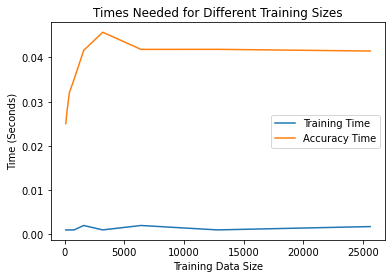

In [77]:
def Q3(train_sizes, accuracies, train_times, eval_times):

### STUDENT START ###
    
    # make model
    knn = KNeighborsClassifier(n_neighbors=1)
    
    # 1-Nearest Neighbor model for each training size
    for num in train_sizes:
        # get start time
        start = time.time()
        # fit model with training sizes
        knn.fit(mini_train_data[:num], mini_train_labels[:num])
        # get training time
        curr = time.time()
        # measure accuracy
        score = knn.score(dev_data, dev_labels)
        # get accuracy time and append
        end = time.time()
        
        # append accuracy
        accuracies.append(score)
        # calculate times and append
        traintime = curr-start
        scoretime = end-curr
        train_times.append(traintime)
        eval_times.append(scoretime)
        
        # print results
        print("Training size =", num, "accuracy:", score)
        print("Time needed for training:", traintime)
        print("Time needed for calculating accuracy:", scoretime)
        print()
        
    # plot
    plt.figure()
    plt.plot(train_sizes, train_times, label="Training Time")
    plt.plot(train_sizes, eval_times, label="Accuracy Time")
    plt.title("Times Needed for Different Training Sizes")
    plt.xlabel("Training Data Size")
    plt.ylabel("Time (Seconds)")
    plt.legend()
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)

Part 4: We see the time needed to train the data is relatively fast whereas the time needed to calculate the accuracy takes much longer. This makes sense given we are using the mini training set which is much smaller than the original training set as well as smaller than the development data. We also see a slight increase in time as the training sizes increase which makes sense because there is more data to process. 

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

R2: 0.21010205481274857
Accuracy for 60,000 = 1.0292545896883352
Accuracy for 120,000 = 1.2346084011665537
Accuracy for 1,000,000 = 4.246464302847092
R2: 0.7022929342593158
Accuracy for 60,000 = 0.9453824447761779
Accuracy for 120,000 = 0.9648991114428446
Accuracy for 1,000,000 = 1.0245985199408734


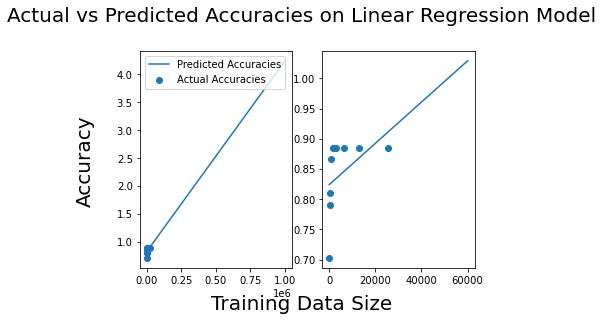

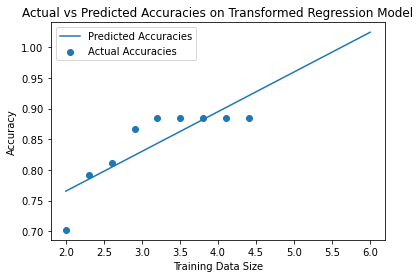

In [150]:
def Q4():

### STUDENT START ###

    # make train_sizes and accuracies into arrays
    train_sizes_arr = np.array(train_sizes).reshape(-1,1)
    # make linear regression model
    model = LinearRegression()
    model.fit(train_sizes_arr, accuracies)
    
    # print R2 of regression model
    ssres = sum((accuracies - model.predict(train_sizes_arr))**2)
    sstot = sum((accuracies - np.mean(accuracies))**2)
    r2 = 1 - (ssres/sstot)
    print("R2:", r2)
    
    # print accuracies for training set sizes 60,000, 120,000, 1,000,000
    pred_acc = model.predict(np.array([60000, 120000, 1000000]).reshape(-1, 1))
    print("Accuracy for 60,000 =", pred_acc[0])
    print("Accuracy for 120,000 =", pred_acc[1])
    print("Accuracy for 1,000,000 =", pred_acc[2])
    
    # plot
    plt.figure()
    ax = plt.subplot(1, 2, 1)
    x = np.linspace(train_sizes_arr.min(), 1000000, 100).reshape(-1,1)
    plt.scatter(train_sizes_arr, accuracies, label="Actual Accuracies")
    plt.plot(x, model.predict(x), label="Predicted Accuracies")
    plt.legend()
    
    # close up of previous plot
    ax = plt.subplot(1, 2, 2)
    x = np.linspace(train_sizes_arr.min(), 60000, 100).reshape(-1,1)
    plt.scatter(train_sizes_arr, accuracies, label="Actual Accuracies")
    plt.plot(x, model.predict(x), label="Predicted Accuracies")

    # title
    plt.figtext(0.5, 1, "Actual vs Predicted Accuracies on Linear Regression Model", ha='center', va='center', fontsize=20)
    # x-axis label
    plt.figtext(0.5, 0, "Training Data Size", ha='center', va='center', fontsize=20)
    # y-axis label
    plt.figtext(0, 0.5, "Accuracy", ha='center', va='center', fontsize=20, rotation=90)


    # TRANSFORMATION
    # make train_sizes and accuracies into arrays
    train_sizes_arr = np.array(train_sizes).reshape(-1,1)
    log_arr = np.log10(train_sizes_arr)
    # make linear regression model
    model = LinearRegression()
    model.fit(log_arr, accuracies)
    
    # print R2 of regression model
    ssres = sum((accuracies - model.predict(log_arr))**2)
    sstot = sum((accuracies - np.mean(accuracies))**2)
    r2 = 1 - (ssres/sstot)
    print("R2:", r2)
    
    # print accuracies for training set sizes 60,000, 120,000, 1,000,000
    pred_acc = model.predict(np.log10(np.array([60000, 120000, 1000000]).reshape(-1, 1)))
    print("Accuracy for 60,000 =", pred_acc[0])
    print("Accuracy for 120,000 =", pred_acc[1])
    print("Accuracy for 1,000,000 =", pred_acc[2])
    
    # plot
    plt.figure()
    x = np.linspace(np.log10(train_sizes_arr.min()), np.log10(1000000), 100).reshape(-1,1)
    plt.scatter(log_arr, accuracies, label="Actual Accuracies")
    plt.plot(x, model.predict(x), label="Predicted Accuracies")
    plt.title("Actual vs Predicted Accuracies on Transformed Regression Model")
    plt.xlabel("Training Data Size")
    plt.ylabel("Accuracy")
    plt.legend()
    
### STUDENT END ###

Q4()

Answer to part 5: The two things wrong with our model is assuming linearity with the training size and accuracy as well as our accuracy values which go up to around 4.

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


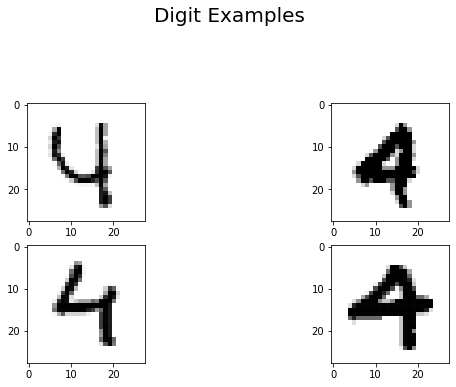

In [164]:
def Q5():

### STUDENT START ###
    
    # make 1-Nearest Neighbor model
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
    
    #show confusion matrix
    print(confusion_matrix(dev_labels, knn.predict(dev_data)))
    
    #show examples of misclassified digit
    # make the plot size
    plt.figure(figsize=(10,10))
    # get 10 examples of misclassification
    example = np.where((dev_labels == '4') & (knn.predict(dev_data) == '9'))[0]
    for i in range(4):
        # make subplots for each item
        plt.subplot(4, 2, i+1)
        # plot the pulled digit from the array created earlier
        digit = dev_data[example[i]].reshape((28,28))            
        plt.imshow(digit)
    # title
    plt.figtext(0.5, 1, "Digit Examples", ha='center', va='center', fontsize=20)
    
### STUDENT END ###

Q5()


Answer to part 3: 4 is often mistaken for 9
